<img src="Img/img_2.png" alt="FST Logo" width="1900" height="900" >
<h1 style="text-align:center;font-size:200%;;">Water Cycle Algorithm</h1>
<h4 style="text-align:center;">Réaliser par  :  DAGHMOUMI Marouan </h4>
<h4 style="text-align:center;">Encadré par  : Pr. JEBARI Khalid</h4>

## Définition
L'Algorithme du Cycle de l'Eau (ACE) est une méthode d'optimisation métaheuristique inspirée du cycle hydrologique naturel. Cet algorithme simule le mouvement de l'eau dans la nature, de la pluie aux rivières et à la mer, ainsi que l'évaporation et les précipitations.

## Principe

L'ACE fonctionne en initialisant une population de gouttes d'eau (solutions candidates) et en les classant en mer (meilleure solution), rivières et ruisseaux. Les ruisseaux coulent vers les rivières, qui à leur tour coulent vers la mer. L'évaporation et les précipitations sont simulées pour maintenir la diversité des solutions.

## Étapes

### 1. Initialisation

Générer une population initiale de gouttes d'eau de manière aléatoire. Chaque goutte représente une solution potentielle au problème d'optimisation.

$\[ \mathbf{X}_i = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(\mathbf{X}_i\)$ : Position de la \(i\)-ème goutte d'eau.
- $\(\mathbf{X}_{\min}\)$ : Limite inférieure de l'espace de recherche.
- $\(\mathbf{X}_{\max}\)$ : Limite supérieure de l'espace de recherche.
- $\(\mathbf{r}_i\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 2. Évaluation

Évaluer la fitness de chaque goutte d'eau en utilisant la fonction objectif du problème d'optimisation.

$\[ f_i = f(\mathbf{X}_i) \]$

- $\(f_i\)$ : Fitness de la \(i\)-ème goutte d'eau.
- $\(f(\cdot)\)$ : Fonction objectif.

### 3. Classification

Classer les gouttes d'eau : la meilleure devient la mer, les Nsr suivantes deviennent des rivières, et le reste sont des ruisseaux.

$\[ \mathbf{X}_{\text{Mer}} = \arg \min_{\mathbf{X}_i} f(\mathbf{X}_i) \]$

### 4. Flux vers les rivières

Mettre à jour la position de chaque ruisseau en le faisant couler vers une rivière.

$\[ \mathbf{X}_{\text{ruisseau}_i}^{\text{nouveau}} = \mathbf{X}_{\text{ruisseau}_i} + \mathbf{r} \cdot C \cdot (\mathbf{X}_{\text{rivière}_j} - \mathbf{X}_{\text{ruisseau}_i}) \]$

- $\(C\)$ : Constante de flux (généralement entre 1 et 2).
- $\(\mathbf{r}\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 5. Flux vers la mer

Mettre à jour la position de chaque rivière en la faisant couler vers la mer.

$\[ \mathbf{X}_{\text{rivière}_k}^{\text{nouveau}} = \mathbf{X}_{\text{rivière}_k} + \mathbf{r} \cdot C \cdot (\mathbf{X}_{\text{Mer}} - \mathbf{X}_{\text{rivière}_k}) \]$

### 6. Évaporation et Précipitations

Si un ruisseau ou une rivière est trop proche de la mer (distance < dmax), il s'évapore et une nouvelle solution est générée aléatoirement.

$\[ \text{Si } \|\mathbf{X}_i - \mathbf{X}_{\text{Mer}}\| < d_{\max}, \text{ alors } \mathbf{X}_i = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(d_{\max}\)$ : Distance d'évaporation.

### 7. Mise à jour de la mer

Si une rivière est meilleure que la mer, elles échangent leurs positions.

### 8. Terminaison

Si les critères d'arrêt sont atteints (par exemple, nombre maximum d'itérations atteint, solution suffisamment bonne), arrêter l'algorithme et renvoyer la position de la mer comme meilleure solution. Sinon, retourner à l'étape 2.

L'ACE est particulièrement efficace pour les problèmes d'optimisation globale et peut s'adapter à une variété de domaines d'application. Son principal avantage réside dans sa capacité à équilibrer l'exploration de l'espace de recherche et l'exploitation des meilleures solutions trouvées, tout en maintenant la diversité grâce au mécanisme d'évaporation et de précipitations.

<img src="Img/chart_water.png" alt="FST Logo" width="1000" height="1500" >

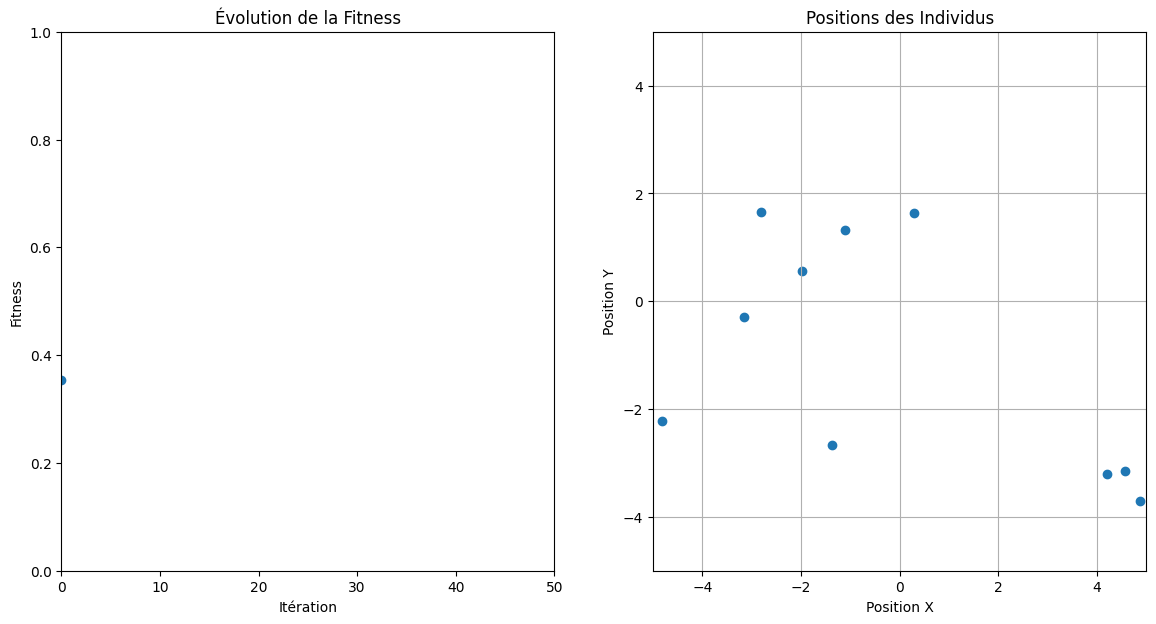

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Définition de la fonction objectif (exemple simple : somme des carrés)
def objective_function(x):
    return np.sum(x**2)

# Fonction pour initialiser la population
def initialize_population(pop_size, dimensions, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))

# Fonction pour évaluer la fitness de chaque individu dans la population
def evaluate_fitness(population):
    return np.apply_along_axis(objective_function, 1, population)

# Fonction pour trouver le meilleur individu dans la population
def find_best_individual(population, fitness):
    best_idx = np.argmin(fitness)
    return population[best_idx], fitness[best_idx]

# Paramètres de l'algorithme
pop_size = 10
dimensions = 2
lower_bound = -5.0
upper_bound = 5.0
max_iter = 50
alpha = 0.1
beta = 0.8
gamma = 0.5

# Initialisation de la population
population = initialize_population(pop_size, dimensions, lower_bound, upper_bound)

# Création de la figure pour la visualisation
fig, (ax_fitness, ax_population) = plt.subplots(1, 2, figsize=(14, 7))
ax_fitness.set_xlabel('Itération')
ax_fitness.set_ylabel('Fitness')
ax_fitness.set_title('Évolution de la Fitness')
ax_population.set_xlim(lower_bound, upper_bound)
ax_population.set_ylim(lower_bound, upper_bound)
ax_population.set_xlabel('Position X')
ax_population.set_ylabel('Position Y')
ax_population.set_title('Positions des Individus')
ax_population.grid(True)

# Initialisation du scatter plot pour les positions des individus
scatter = ax_population.scatter(population[:, 0], population[:, 1])

# Liste pour stocker les meilleures fitness à chaque itération
best_fitness_values = []

# Output widget pour afficher les graphiques et la table
output = Output()

# Fonction pour exécuter une itération de l'algorithme Water Cycle
def run_iteration(b):
    global population, best_fitness_values

    # Évaluation de la fitness de la population
    fitness = evaluate_fitness(population)

    # Recherche du meilleur individu
    best_individual, best_fitness = find_best_individual(population, fitness)
    best_fitness_values.append(best_fitness)

    # Calcul de l'évaporation pour chaque individu
    evaporation = (1 - fitness / best_fitness) * alpha

    # Calcul de la quantité de précipitation pour chaque individu
    precipitation = beta * (1 - evaporation) * gamma

    # Sélection des individus qui reçoivent de la précipitation
    infiltration_mask = precipitation > np.random.rand(pop_size)

    # Mise à jour des positions des individus
    new_population = population.copy()
    new_population[infiltration_mask] = np.random.uniform(lower_bound, upper_bound, size=(np.sum(infiltration_mask), dimensions))
    new_population[~infiltration_mask] += np.random.uniform(-1.0, 1.0, size=(np.sum(~infiltration_mask), dimensions))

    # Mise à jour de la population
    population = new_population

    # Mise à jour du scatter plot
    scatter.set_offsets(population)

    # Mise à jour du graphique de fitness
    ax_fitness.plot(range(len(best_fitness_values)), best_fitness_values, marker='o', linestyle='-')
    ax_fitness.set_xlim(0, max_iter)
    ax_fitness.set_ylim(0, max(max(best_fitness_values) * 1.1, 1))

    # Affichage dans l'output widget
    with output:
        display.clear_output(wait=True)
        display.display(fig)

    # Affichage des résultats dans une table
    fitness_df = pd.DataFrame({'Fitness': fitness})
    with output:
        display.display(fitness_df)

# Bouton pour l'itération suivante
button = Button(description="Itération suivante")
button.on_click(run_iteration)

# Affichage initial de la figure et du bouton
display.display(VBox([button, output]))

# Exécution de la première itération
run_iteration(None)


<h1 style="text-align:center;font-size:200%;">TSP problem</h1>

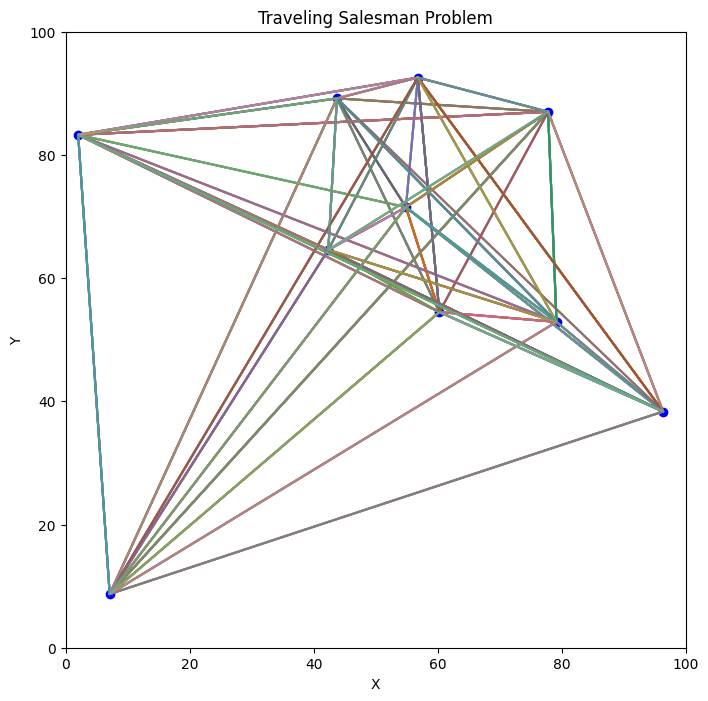

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Function to calculate the Euclidean distance between two cities (points)
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Function to calculate the total distance of a route
def calculate_total_distance(route, cities):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance(cities[route[i]], cities[route[i + 1]])
    total_distance += distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
    return total_distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = np.random.permutation(num_cities)
        population.append(route)
    return population

# Evaluate fitness (total distance) for each route in the population
def evaluate_fitness(population, cities):
    fitness = []
    for route in population:
        fitness.append(calculate_total_distance(route, cities))
    return np.array(fitness)

# Find the best individual (route with the shortest distance)
def find_best_individual(population, fitness):
    best_idx = np.argmin(fitness)
    return population[best_idx], fitness[best_idx]

# Water Cycle Algorithm parameters
pop_size = 50
max_iter = 50
alpha = 0.1
beta = 0.8
gamma = 0.5

# Generate cities (random coordinates for demonstration)
np.random.seed(0)
num_cities = 10
cities = np.random.rand(num_cities, 2) * 100  # Random coordinates between 0 and 100

# Initialize population of routes (permutations of cities)
population = initialize_population(pop_size, num_cities)

# Create figure for visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_title('Traveling Salesman Problem')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Scatter plot for cities
ax.scatter(cities[:, 0], cities[:, 1], c='blue', marker='o', label='Cities')

# Initialize scatter plot for population
lines = []
for route in population:
    line, = ax.plot(cities[route, 0], cities[route, 1], alpha=0.5)
    lines.append(line)

# Output widget for displaying results
output = Output()

# Function to run one iteration of the Water Cycle Algorithm
def run_iteration(b):
    global population

    # Evaluate fitness of the current population
    fitness = evaluate_fitness(population, cities)

    # Find the best route (shortest distance)
    best_route, best_fitness = find_best_individual(population, fitness)

    # Calculate evaporation for each route
    evaporation = (1 - fitness / best_fitness) * alpha

    # Calculate precipitation probability for each route
    precipitation = beta * (1 - evaporation) * gamma

    # Select routes to be replaced based on precipitation probability
    replace_mask = np.random.rand(pop_size) < precipitation

    # Replace selected routes with new random routes (mutations)
    for i in range(pop_size):
        if replace_mask[i]:
            population[i] = np.random.permutation(num_cities)

    # Update scatter plot for population
    for i, route in enumerate(population):
        lines[i].set_data(cities[route, 0], cities[route, 1])

    # Update output widget (display only fitness values for simplicity)
    with output:
        display.clear_output(wait=True)
        display.display(fig)

# Button for running the next iteration
button = Button(description="Next Iteration")
button.on_click(run_iteration)

# Display initial plot and button
display.display(VBox([button, output]))

# Run the first iteration
run_iteration(None)


<h1 style="text-align:center;font-size:200%;">benchmark</h1>

NameError: name 'population_ras' is not defined

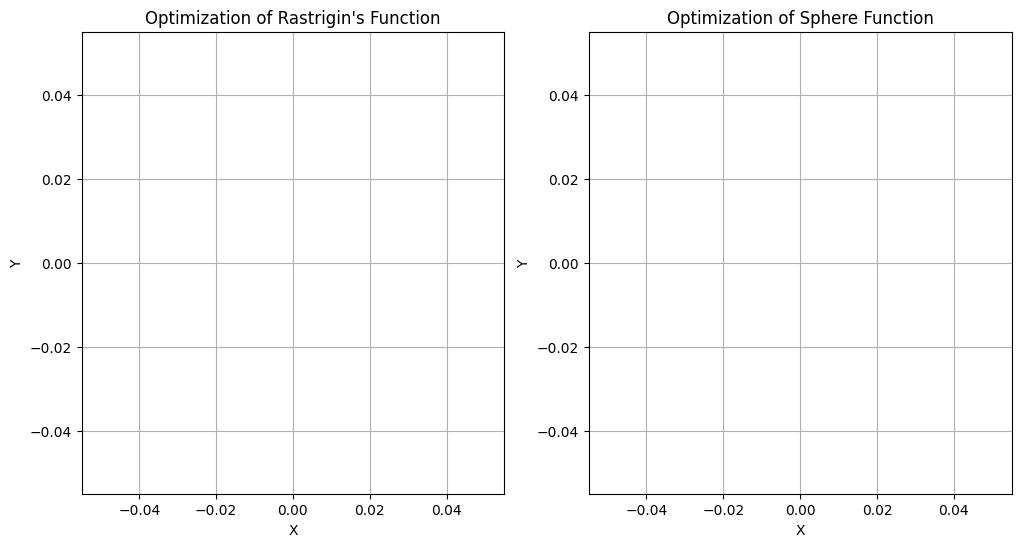

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Rastrigin's Function
def rastrigin(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

# Sphere Function
def sphere(x):
    return np.sum(x**2)

# Water Cycle Algorithm
def water_cycle_algorithm(objective_function, dimensions, lower_bound, upper_bound, pop_size=50, max_iter=50, alpha=0.1, beta=0.8, gamma=0.5):
    # Initialize population
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))
    fitness = np.array([objective_function(ind) for ind in population])
    
    # Track best solution
    best_idx = np.argmin(fitness)
    best_solution = population[best_idx]
    best_fitness = fitness[best_idx]
    
    # Evolution over iterations
    best_fitness_values = [best_fitness]
    
    # Perform iterations
    for it in range(max_iter):
        # Evaporation phase
        evaporation = (1 - fitness / best_fitness) * alpha
        
        # Precipitation phase
        precipitation = beta * (1 - evaporation) * gamma
        
        # Update positions
        new_population = population.copy()
        infiltration_mask = precipitation > np.random.rand(pop_size)
        
        new_population[infiltration_mask] = np.random.uniform(lower_bound, upper_bound, size=(np.sum(infiltration_mask), dimensions))
        new_population[~infiltration_mask] += np.random.uniform(-1.0, 1.0, size=(np.sum(~infiltration_mask), dimensions))
        
        # Update fitness
        fitness = np.array([objective_function(ind) for ind in new_population])
        
        # Update best solution
        if np.min(fitness) < best_fitness:
            best_idx = np.argmin(fitness)
            best_solution = new_population[best_idx]
            best_fitness = fitness[best_idx]
        
        # Store best fitness
        best_fitness_values.append(best_fitness)
        
        # Update population
        population = new_population
    
    return best_solution, best_fitness_values

# Water Cycle Algorithm parameters
pop_size = 50
max_iter = 50
alpha = 0.1
beta = 0.8
gamma = 0.5

# Create figure for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot settings
ax1.set_title("Optimization of Rastrigin's Function")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True)

ax2.set_title("Optimization of Sphere Function")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True)

# Initialize scatter plots for population
scatter1 = ax1.scatter([], [], c='blue', label='Population')
scatter2 = ax2.scatter([], [], c='blue', label='Population')

# Output widget for displaying results
output = Output()

# Function to run one iteration of the Water Cycle Algorithm for Rastrigin's and Sphere functions
def run_iteration(b):
    global population_ras, population_sph

    # Run WCA for Rastrigin's Function
    best_solution_ras, best_fitness_values_ras = water_cycle_algorithm(rastrigin, dimensions=2, lower_bound=-5.12, upper_bound=5.12,
                                                                       pop_size=pop_size, max_iter=max_iter, alpha=alpha, beta=beta, gamma=gamma)
    population_ras = np.array(population_ras)
    scatter1.set_offsets(population_ras[:, :2])
    
    # Run WCA for Sphere Function
    best_solution_sph, best_fitness_values_sph = water_cycle_algorithm(sphere, dimensions=2, lower_bound=-5.12, upper_bound=5.12,
                                                                       pop_size=pop_size, max_iter=max_iter, alpha=alpha, beta=beta, gamma=gamma)
    population_sph = np.array(population_sph)
    scatter2.set_offsets(population_sph[:, :2])

    # Update output widget (display only fitness values for simplicity)
    with output:
        display.clear_output(wait=True)
        display.display(fig)

# Button for running the next iteration
button = Button(description="Next Iteration")
button.on_click(run_iteration)

# Display initial plot and button
display.display(VBox([button, output]))

# Run the first iteration
run_iteration(None)
